In [1]:
#  Task 6 - K-Nearest Neighbors (KNN) Classification

# Step 1: Importing the required libraries
import pandas as pd                      # For data handling and reading CSV
import matplotlib.pyplot as plt          # For visualization
import seaborn as sns                    # For plotting confusion matrix
from sklearn.model_selection import train_test_split   # To split dataset into train/test
from sklearn.preprocessing import StandardScaler       # To normalize the features
from sklearn.neighbors import KNeighborsClassifier     # KNN classifier
from sklearn.metrics import accuracy_score, confusion_matrix  # For evaluation

In [2]:
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()

# Create a DataFrame from it
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Add target labels as a new column

# Show the first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [3]:
# Step 3: Prepare features (X) and labels (y)
X = df.drop('species', axis=1)    # Features = all columns except 'species'
y = df['species']                 # Labels = species of iris flower


In [4]:
# Step 4: Normalize the feature values
scaler = StandardScaler()         # Create a scaler object
X_scaled = scaler.fit_transform(X)  # Fit and transform the feature data

# This helps ensure that all features contribute equally to the distance metric used in KNN


In [5]:
# Step 5: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [6]:
# Step 6: Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using K=5 neighbors
knn.fit(X_train, y_train)  # Train the classifier with training data


KNeighborsClassifier()

In [7]:
# Step 7: Make predictions on the test set
y_pred = knn.predict(X_test)  # Predict labels using the trained model


In [8]:
# Step 8: Evaluate the model performance
acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
print("✅ Accuracy of KNN model:", acc)

✅ Accuracy of KNN model: 1.0


In [9]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

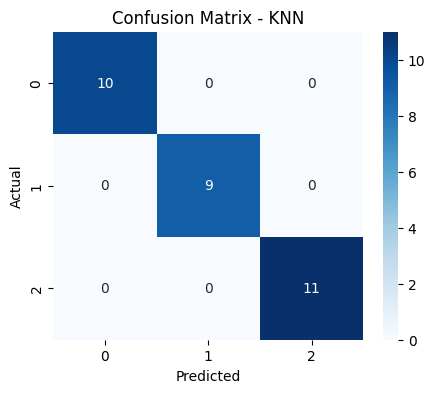

In [10]:
# Visualize the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

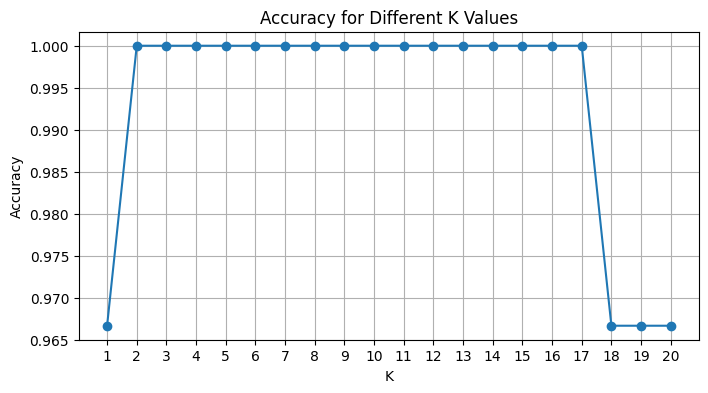

In [11]:
#  BONUS: Try different values of K and see which gives best accuracy

# Let's loop through different K values and plot accuracy
accuracy_scores = []
k_range = range(1, 21)  # Try K from 1 to 20

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc_k = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(acc_k)

# Plot the results
plt.figure(figsize=(8,4))
plt.plot(k_range, accuracy_scores, marker='o')
plt.title("Accuracy for Different K Values")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid()
plt.xticks(k_range)
plt.show()
